<a href="https://colab.research.google.com/github/otario123/MC920/blob/main/Trabalho4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução ao processamento de Imagem - MC920
## Unicamp 2020
## Professor: Hélio Pedrini

***

# Trabalho 4

## Daniel Cardoso Custodio de Oliveira - RA: 169400

# Esteganografia
Uma técnica que consiste em ocultar mensagens dentro de uma imagem sem alterar sua aparência visível

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!for i in baboon ; do wget https://www.ic.unicamp.br/~helio/imagens_coloridas/$i.png ; done; 

--2020-12-31 00:05:35--  https://www.ic.unicamp.br/~helio/imagens_coloridas/baboon.png
Resolving www.ic.unicamp.br (www.ic.unicamp.br)... 143.106.7.54, 2801:8a:40c0:cafe::54
Connecting to www.ic.unicamp.br (www.ic.unicamp.br)|143.106.7.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 637192 (622K) [image/png]
Saving to: ‘baboon.png’

baboon.png          100%[===================>] 622.26K   618KB/s    in 1.0s    

2020-12-31 00:05:37 (618 KB/s) - ‘baboon.png’ saved [637192/637192]



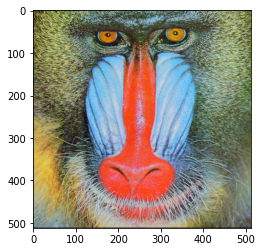

In [3]:
baboon = cv2.cvtColor(cv2.imread("baboon.png"), cv2.COLOR_BGR2RGB)
plt.imshow(baboon)

# Encode e Decode 

O `\0` como identificador de final da mensagem


In [4]:
def encode(img, message):
  flatImg = img.reshape(-1)
  message += "\0"
  strBin = lambda x: bin(ord(x))[2:].zfill(8)
  binaryMsg = "".join([strBin(letter) for letter in message])
  bitSum = lambda x,y: x & 254 | int(y)
  sizeMsg = len(binaryMsg)
  line,column,channel = img.shape
  encodedImg = [bitSum(flatImg[i],binaryMsg[i]) for i in range(sizeMsg)]
  return np.append(encodedImg, flatImg[sizeMsg:]).reshape(line,column,channel)

In [5]:
def decode(img):
  bits = 1 & img.reshape(-1,8)
  
  char_list = "".join([chr(int("".join(map(lambda e: str(e), x)),2)) for x in bits])
  return char_list[:char_list.index("\0")]

# Testes


In [6]:
baboonEncoded = encode(baboon, "Python")
decodedMessage = decode(baboonEncoded)
decodedMessage

'Python'

In [7]:
for message in ["Teste mensagem","MC920", "Processamento de Imagem"]:
  baboonEncoded = encode(baboon, message)
  decodedMessage = decode(baboonEncoded)
  print(f"Original: {message}")
  print(f"Decodificada: {decodedMessage}")
  print("As mensagens iguais" if message == decodedMessage else "As mensagens diferentes")


Original: Teste mensagem
Decodificada: Teste mensagem
As mensagens iguais
Original: MC920
Decodificada: MC920
As mensagens iguais
Original: Processamento de Imagem
Decodificada: Processamento de Imagem
As mensagens iguais


In [8]:
def plotImages(title1,title2,img1,img2,isGray = False):
  fig, ax = plt.subplots(1, 2, figsize=(10, 10))

  ax[0].imshow(img1,cmap= ("gray" if isGray else None))
  ax[0].set_title(title1)

  ax[1].imshow(img2,cmap= ("gray" if isGray else None))
  ax[1].set_title(title2)

  for a in ax:
      a.axis('off')

  plt.show()

# Comparação


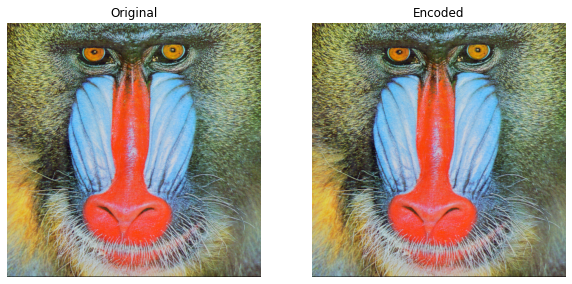

In [9]:
plotImages("Original","Encoded",baboon,baboonEncoded,True)

# Planos de Bits


Plano de bits número 7

Canal de cor vermelho


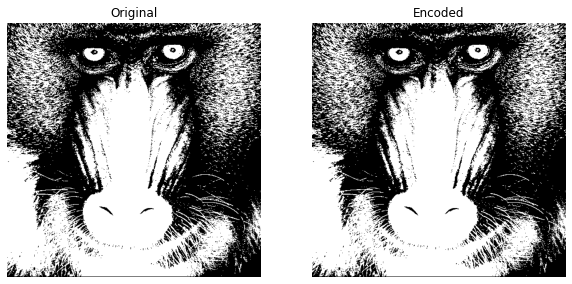


Canal de cor verde


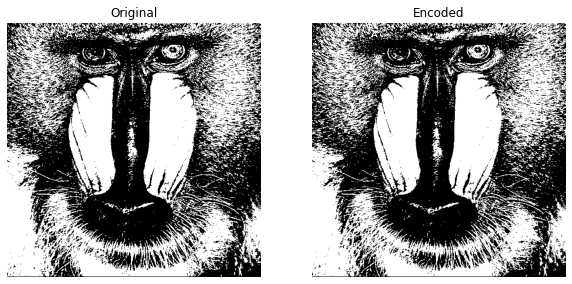


Canal de cor azul


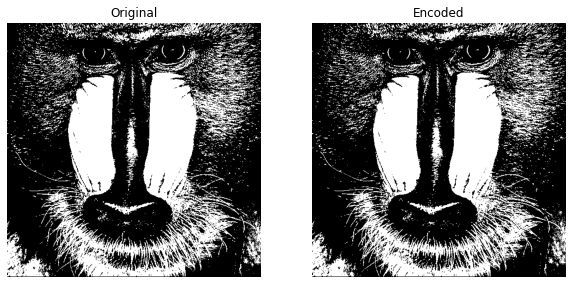

Plano de bits número 0

Canal de cor vermelho


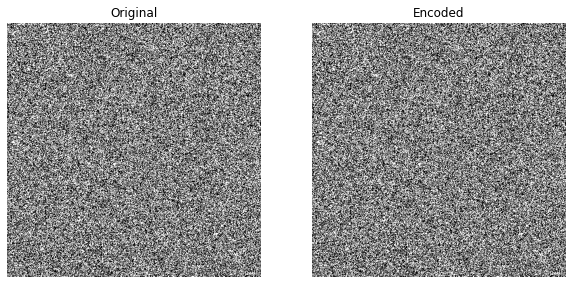


Canal de cor verde


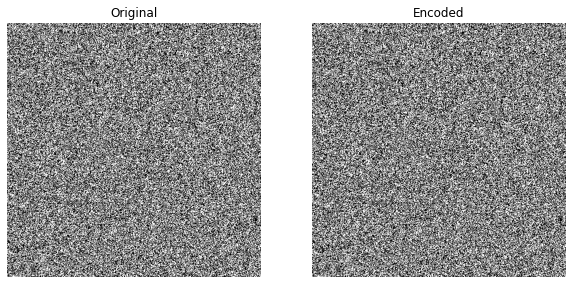


Canal de cor azul


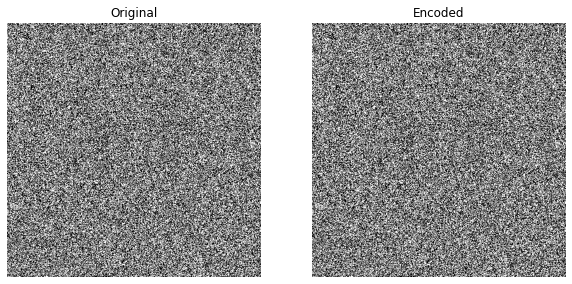

Plano de bits número 1

Canal de cor vermelho


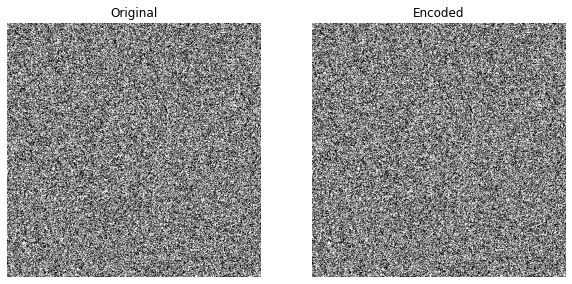


Canal de cor verde


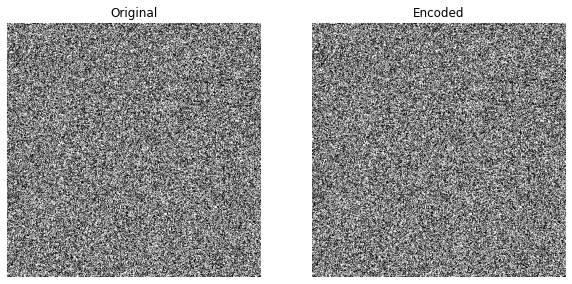


Canal de cor azul


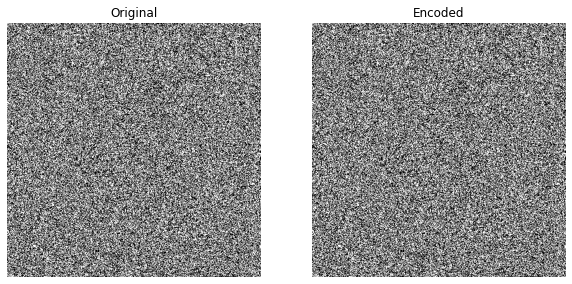

Plano de bits número 2

Canal de cor vermelho


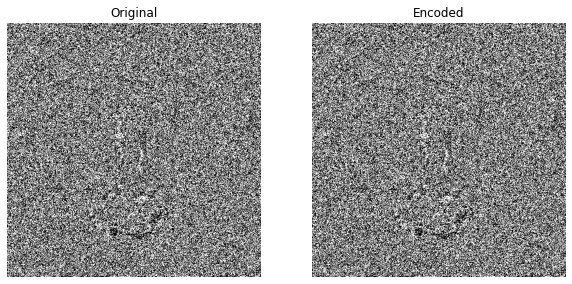


Canal de cor verde


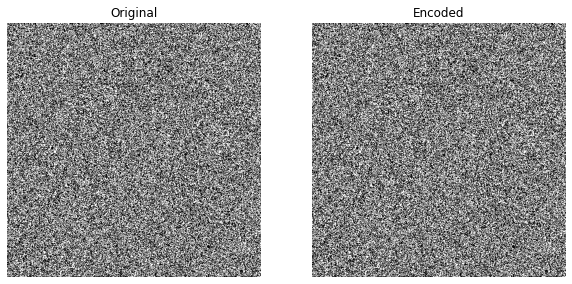


Canal de cor azul


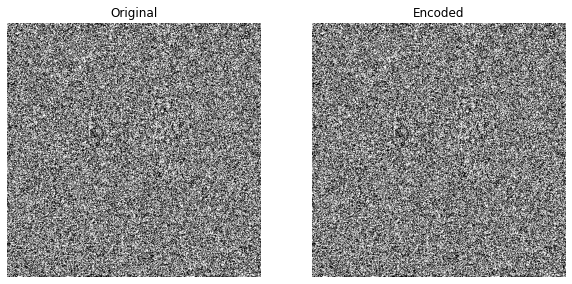

In [10]:
for i in [7,0,1,2]:
  bitPlaneEncoded = (((1 << i) & baboonEncoded)/(1 << i))
  bitPlane = (((1 << i) & baboon)/(1 << i))

  print(f"Plano de bits número {i}")

  for index,canal in enumerate(['vermelho','verde','azul']):

    print(f"\nCanal de cor {canal}")
    plotImages("Original","Encoded",bitPlane[:,:,index],bitPlaneEncoded[:,:,index],True)

In [12]:
values, nValues = np.unique(baboonEncoded - baboon, return_counts=True)
porcentagemValoresInalterados = (nValues[values==0]/nValues.sum())[0]
print("Porcentagem dos bytes inalterados: {:.6f}".format(porcentagemValoresInalterados*100))
print("Porcentagem dos bytes alterados: {:.6f}".format((1-porcentagemValoresInalterados)*100))

Porcentagem dos bytes inalterados: 99.987030
Porcentagem dos bytes alterados: 0.012970
